In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import random
import scipy as sp

In [37]:
class Logistic:
#     def __init__(self, epsilon = 0.5, t_0 = int(0), T = int(100), a = 2.5, n_nodes = None,
#                  av_degree = 8, x0 = 1.3, tau_zero = int(1), type_of_graph = 1):
    def __init__(self, epsilon = 0.5, t_0 = int(0), T = int(100), a = 2.5,
                     x0 = 1.3, tau_zero = int(1), n_nodes = None, graph = None):
        '''
        PARAMETERS:
        epsilon: float
        t_0: float
        T:float
           Total time of simulated activity
        n_nodes: int
            Number of logistic maps
        av_degree: int
            Average degree of the graph
        x0: float
            Initial state of the logistic map
        tau_zero: int
            Delay parameter
        type_of_graph: int
            If 1, then the graph will follow the Barabasi-Albert
            model. If it's another number it will be Small-World.
        '''
        if n_nodes is None:
            raise ValueError("n_nodes must be specified")
        else:
            self.n_nodes = n_nodes
        self.epsilon = epsilon
        self.t_0 = t_0
        self.T = T
#         self.av_degree = av_degree
        self.x0 = [x0]
        self.tau_zero = tau_zero
#         self.type_of_graph = type_of_graph
        self.a = a
        if graph is None:
            raise ValueError("graph must be specified")
        else:
            self.G = graph
        
    def logistic(self, x):
        return x*self.a*(1-x)
    
#     def generate_graph(self):
#         if self.type_of_graph == 1:
#             m = int(self.av_degree/2) 
#             self.G = nx.barabasi_albert_graph(self.n_nodes,m) 
#         else: 
#             k = int(self.av_degree/2)
#             p = 1 #probability of rewiring
#             self.G = nx.watts_strogatz_graph(self.n_nodes, k, p, seed=None)
#         return self.G
    
    def adjacency_matrix(self):
        self.M = nx.to_numpy_array(self.G)
        return self.M
    
    def calculate_b(self,index):
        return np.sum(self.M[index])
    
    def Tau_matrix(self):
        self.tau_matrix = []
        for i in range(0,self.n_nodes):
            tau = []
            for j in range(0,self.n_nodes):
                tau.append(int(self.tau_zero + np.random.uniform(0,1)))
            self.tau_matrix.append(tau)
        return self.tau_matrix
    
    def interation(self):
        self.M = self.adjacency_matrix()
        self.tau_matrix = self.Tau_matrix()
        self.mapas = {}
        for i in range(0,self.n_nodes):
            self.mapas[i] = [(np.random.uniform(0,1))] #Definindo os valores iniciais dos mapas    

        for t in range(1,self.T): #Percorre nos intervalos de tempo
            for i in range(0,self.n_nodes): #Percorre em todos os nós
                x_T = (1-self.epsilon)*self.logistic(self.mapas[i][t-1])
                soma = []
                for j in range(0,self.n_nodes): #Calcula o somatorio pra cada um dos nós
                    tau = self.tau_matrix[i][j]
                    soma.append((self.epsilon/self.calculate_b(i))*self.M[i][j]*
                                self.logistic(self.mapas[j][t-tau])) 
                x_T = x_T + np.sum(soma)
#                 print(soma)
                self.mapas[i].append(x_T)
#             print(x_T)
        return self.mapas
        
    def run(self):
        return self.interation()
    
    def Sigma(self):
        space_mean = []
        for i in range(self.n_nodes): #Calculando a media espacial 
            space_mean.append(self.mapas[i][self.T-1])
        space_mean = np.mean(space_mean)
        sigma = []
        for i in range(n_nodes): #Somatorio 
            k = (self.mapas[i][self.T-1]-space_mean)**2
            sigma.append(k)
        sigma = sum(sigma)
        return (1/self.n_nodes)*(sigma/self.T) #Retorna a média temporal do somatorio divido por n_nodes
    
    def Sigma_line(self):
        sigma_line = []
        for i in range(n_nodes):
            k = (self.mapas[i][self.T-1]- self.mapas[i][0])**2
            sigma_line.append(k)
        sigma_line = sum(sigma_line)
        return (1/self.n_nodes)*(sigma_line/self.T)

In [3]:
# matrix_sigmas = []
# matrix_sigmas_line = []
# for i in range(20,2,-1):
#     list_sigmas = []
#     list_sigmas_line = []
#     for j in range(0,100):
#         T = 20
#         n_nodes = 200
#         log = Logistic(epsilon = 0.01*j, T = T, a = 4, n_nodes = n_nodes, av_degree = i, tau_zero = 1, type_of_graph=1)
#         mapas = log.run()
#         list_sigmas.append(log.Sigma())
#         list_sigmas_line.append(log.Sigma_line())
#     matrix_sigmas.append(list_sigmas)
#     matrix_sigmas_line.append(list_sigmas_line)

In [7]:
# n_nodes = 200
# T = 10
# log = Logistic(epsilon = 0.5, T = T, a = 4, n_nodes = n_nodes, av_degree = 5, tau_zero = 1, type_of_graph=1)
# mapas = log.run()

In [8]:
# epsilon_values = np.linspace(0,1,100)
# b_values = np.linspace(2,19,18)
# CS = plt.contourf(epsilon_values,b_values,matrix_sigmas, cmap = "inferno") #O eixo y ta trocado, é pra ser de 20 ate 2 
#                                                                            #e nao de 2 ate 20.
# cbar = plt.colorbar(CS)
# plt.xlabel(r"$\varepsilon$", fontsize = 14)
# plt.ylabel(r'$\langle b \rangle$', fontsize = 14)
# plt.savefig('barabasi_albert.png', dpi = 150, bbox_inches = 'tight')
# plt.show()

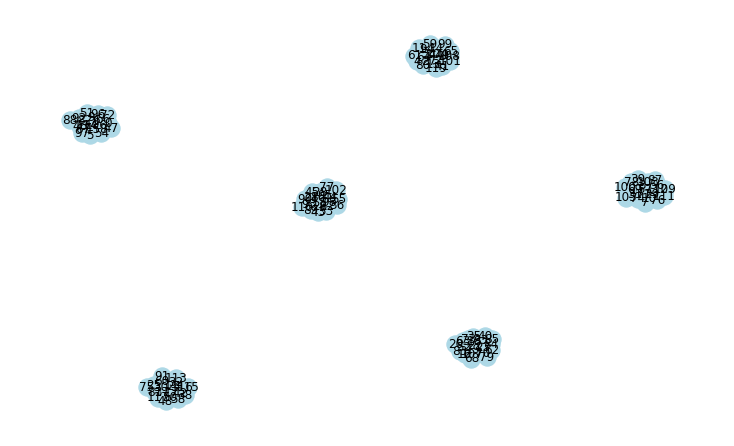

In [56]:
N = 120
tau1 = 2
tau2 = 1.5
mu = 0.02
k = 15
minc = 20
maxc = 20
G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, 
                        max_degree = k, min_community=minc, max_community = maxc, seed = 10)
G.remove_edges_from(nx.selfloop_edges(G))
pos=nx.spring_layout(G)
fig= plt.figure(figsize=(10,6))
nx.draw(G, pos=pos, node_color = 'lightblue', with_labels = True)
plt.show(True)

In [64]:
N = 7500  #Number of nodes in the created graph.
gam = 3  #Power law exponent for the degree distribution of the created graph
bet = 2 #Power law exponent for the community size distribution in the created graph
mu = 0.3 #Fraction of inter-community edges incident to each node
G = nx.LFR_benchmark_graph(N, tau1=gam, tau2=bet, mu=mu, average_degree=5,max_degree=80,
                     min_community=5,max_community=180)

In [65]:
T = 10
n_nodes = N
log = Logistic(epsilon = 0.5, T = T, a = 4, n_nodes = n_nodes, tau_zero = 1, graph = G)

In [66]:
mapas = log.run()

In [67]:
sigmas = log.Sigma()
sigmas

0.0060286199256754745